Lab 4

Tăng Mỹ Hân

22520395

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import cdist

# Assignment 1

- Generate a toy dataset having $600$ data points, $200$ points of them following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma)$, $200$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma)$, and $200$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma)$ where $\Sigma =
\left(\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right)
$.
- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of intializing centroids randomly to the overall performance of K-means.

In [ ]:
np.random.seed(42)
cov = [[1, 0], [0, 1]]
N = 200
X1 = np.random.multivariate_normal([2, 2], cov, N)
X2 = np.random.multivariate_normal([8, 3], cov, N)
X3 = np.random.multivariate_normal([3, 6], cov, N)

X = np.vstack((X1, X2, X3))

In [ ]:
def display_kmeans(X, centroids, labels, title=None):
  plt.figure(figsize=(8, 6))
  scatter = plt.scatter(X[:, 0], X[:, 1], c=labels)
  if centroids is not None:
      plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label='Centroids')
      plt.legend()

  plt.title(title)

  # Tạo chú giải cho các cluster
  unique_labels = np.unique(labels)
  for label in unique_labels:
    plt.scatter([], [], color=scatter.cmap(scatter.norm(label)), label=f'Cluster {label}')

  plt.legend()
  plt.show()

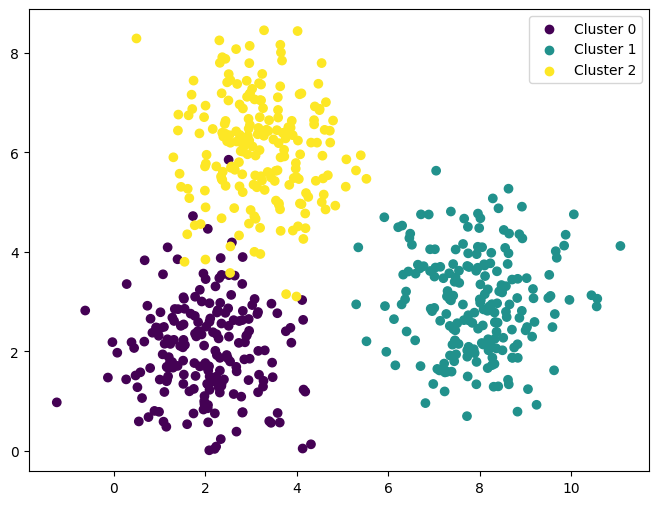

In [ ]:
original_labels = np.asarray([0]*N + [1]*N + [2]*N).T
display_kmeans(X, None, original_labels)

In [ ]:
def initialize_centroids(X, k):
  idx = np.random.choice(X.shape[0], k, replace=False)
  return X[idx]

def assign_clusters(X, centroids):
  distances  = cdist(X, centroids)
  return np.argmin(distances, axis=1)

def update_centroids(X, clusters, k):
  centroids = np.zeros((k, X.shape[1]))
  for i in range(k):
    centroids[i] = np.mean(X[clusters == i], axis=0)
  return centroids

def has_converged(old_centroids, centroids):
  return set([tuple(a) for a in old_centroids]) == set([tuple(a) for a in centroids])

def kmeans(X, k):
  centroids = [initialize_centroids(X, k)]
  labels = []
  iter = 0
  while True:
    labels.append(assign_clusters(X, centroids[-1]))
    new_centroids = update_centroids(X, labels[-1], k)
    if has_converged(centroids[-1], new_centroids):
      break
    centroids.append(new_centroids)
    iter += 1
  return (centroids, labels, iter)

Các centroid:
 [[7.93924027 2.98407134]
 [3.1984887  6.11049523]
 [2.0191059  2.03147588]]


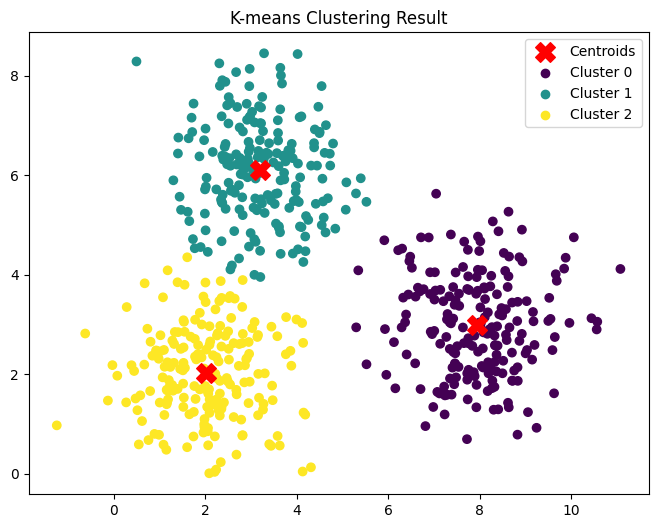

In [ ]:
(centroids, labels, it) = kmeans(X, k=3)
print("Các centroid:\n", centroids[-1])
display_kmeans(X, centroids[-1], labels[-1], title='K-means Clustering Result')

**Nhận xét:**

- Ta có thể thấy việc phân cụm dùng k-means trong bài toán này hoạt động khá tốt, các cluster tìm được tương ứng khá tốt với ba phân phối Gaussian ban đầu.
- Tuy nhiên, kết quả phân cụm có thể thay đổi phụ thuộc vào cách chọn các centroid ban đầu. Khi thuật toán được chạy nhiều lần với các khởi tạo ngẫu nhiên khác nhau, ta nhận thấy kết quả có nhiều sự thay đổi.

# Assignment 2
- Generate a toy dataset having $50$ points following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma)$, $20$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma)$, and $1000$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma)$ where $\Sigma =
\left(\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right)
$.
- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of different sizes among clusters to the performance of K-means.

In [ ]:
cov = [[1, 0], [0, 1]]

X1 = np.random.multivariate_normal([2, 2], cov, 50)
X2 = np.random.multivariate_normal([8, 3], cov, 20)
X3 = np.random.multivariate_normal([3, 6], cov, 1000)

X = np.vstack((X1, X2, X3))

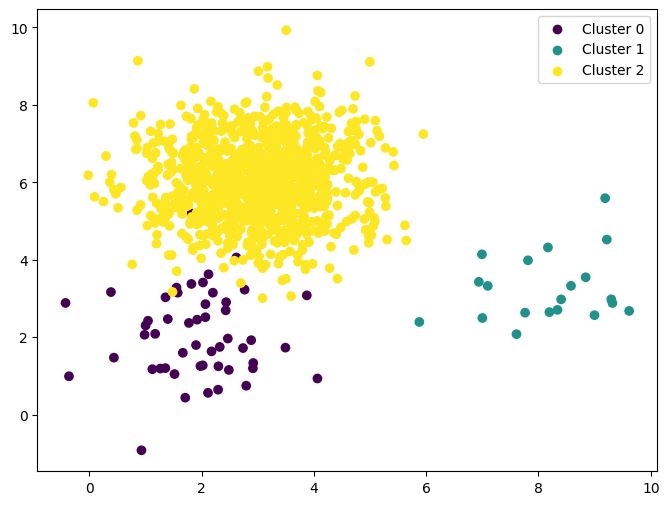

In [ ]:
original_labels = np.asarray([0]*X1.shape[0] + [1]*X2.shape[0] + [2]*X3.shape[0]).T
display_kmeans(X, None, original_labels)

Các centroid:
 [[2.14978355 5.96489689]
 [3.61727473 3.75137754]
 [3.72868264 6.55141179]]


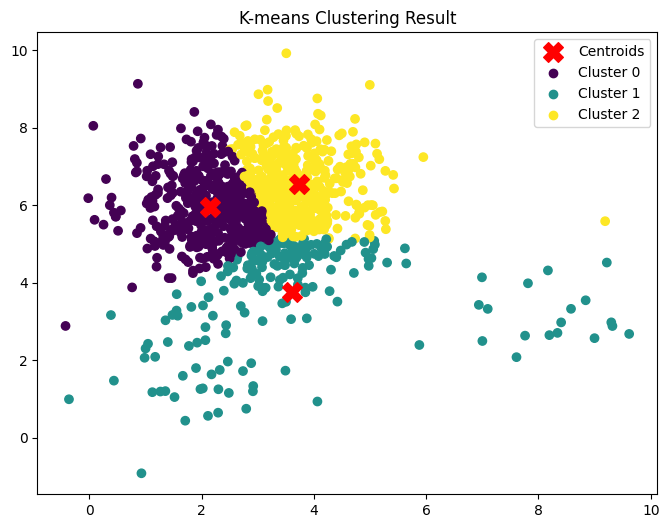

In [ ]:
(centroids, labels, it) = kmeans(X, k=3)
print("Các centroid:\n", centroids[-1])
display_kmeans(X, centroids[-1], labels[-1], title='K-means Clustering Result')

**Nhận xét:**
- Quan sát cho thấy thuật toán K-means có xu hướng tạo ra các cluster có kích thước gần bằng nhau, ngay cả khi kích thước thực tế của các nhóm trong dữ liệu là khác nhau. Cụm lớn nhất [3, 6] với 1000 điểm (màu vàng) chiếm phần lớn dữ liệu và ảnh hưởng đến 2 cụm còn lại là cụm [2, 2], [8, 3] (màu tím và xanh) không thể phân biệt rõ ràng, một phần bị hòa lẫn vào cụm lớn.

- Các centroid đều bị lệch vào cụm lớn do ảnh hưởng của khối lượng dữ liệu. Như vậy, sự khác biệt đáng kể về kích thước giữa các cụm có thể ảnh hưởng đến hiệu suất của thuật toán K-means.

# Assignment 3
- Generate a toy dataset having $600$ data points, $200$ points of them following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma_1)$, $200$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma_1)$, and $200$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma_2)$ where

$$
    \Sigma_1 =
    \left(\begin{array}{cc}
        1 & 0 \\
        0 & 1
    \end{array}\right)
$$

and

$$
\Sigma_2 =
    \left(\begin{array}{cc}
        10 & 0 \\
        0 & 1
    \end{array}\right)
$$.

- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of distribution $\mathcal{N}((3, 6), \Sigma_2)$ to the performance of K-means.

In [ ]:
cov1 = [[1,0], [0,1]]
cov2 = [[10,0], [0,1]]
N = 200

X1 = np.random.multivariate_normal([2,2], cov1, N)
X2 = np.random.multivariate_normal([8,3], cov2, N)
X3 = np.random.multivariate_normal([3,6], cov1, N)

X = np.vstack((X1, X2, X3))

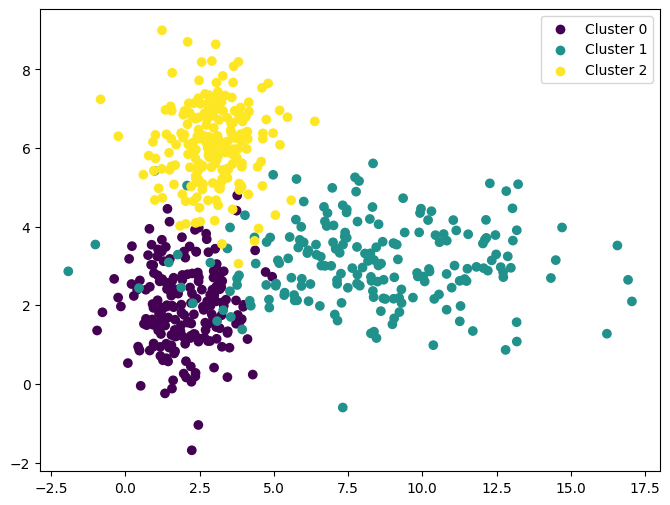

In [ ]:
original_labels = np.array([0]*N + [1]*N + [2]*N)
display_kmeans(X, None, original_labels)

Các centroid:
 [[9.49307244 3.09595125]
 [2.27464236 2.06147461]
 [3.00252963 6.04246416]]


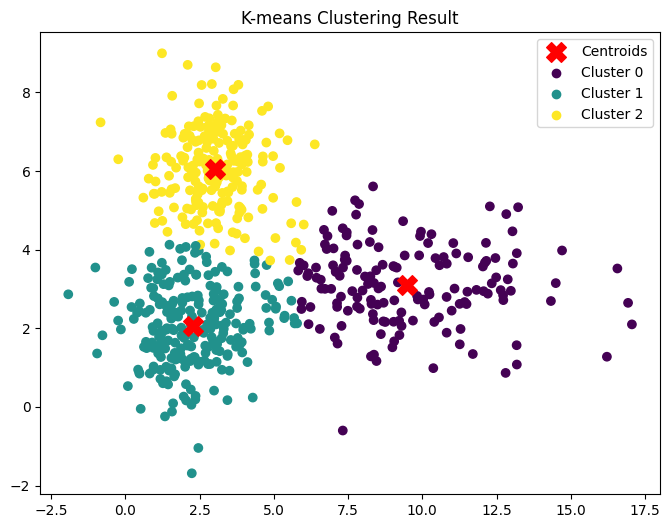

In [ ]:
(centroids, labels, it) = kmeans(X, k=3)
print("Các centroid:\n", centroids[-1])
display_kmeans(X, centroids[-1], labels[-1], title='K-means Clustering Result')

**Nhận xét:**

 Ảnh hưởng của phân phối $\mathcal{N}((3, 6), \Sigma_2)$ đến hiệu suất K-means
 * Phân phối thứ ba với mean (3, 6)  có ma trận hiệp phương sai $\Sigma_2$ khiến cụm này bị kéo dài mạnh theo trục hoành và chồng lấn vào các cụm khác, dẫn đến việc phân loại sai các điểm ở vùng biên.
 * Các centroid vẫn được xác định hợp lý (gần đúng trung tâm cụm), nhưng các điểm không còn được gán nhãn chính xác vì ranh giới cụm không còn phân định rõ.